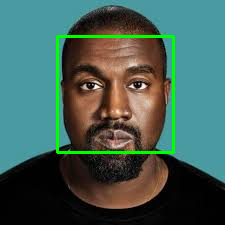

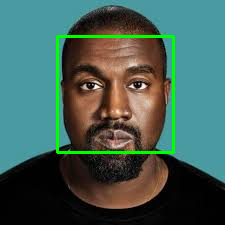

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Cargar el clasificador Haar Cascade para detección de rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Leer la imagen
image = cv2.imread("/content/drive/MyDrive/Colab Notebooks/YE.jpg")   # Cambia "input.jpg" por el nombre de tu imagen
if image is None:
    print("No se pudo cargar la imagen.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Mostrar el proceso de detección
    for (x, y, w, h) in faces:
        img_with_rectangle = image.copy()
        cv2.rectangle(img_with_rectangle, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(img_with_rectangle)
        cv2.waitKey(700)  # No tiene efecto en Colab, pero lo dejamos para compatibilidad

    # Mostrar imagen final con todos los rostros detectados
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2_imshow(image)

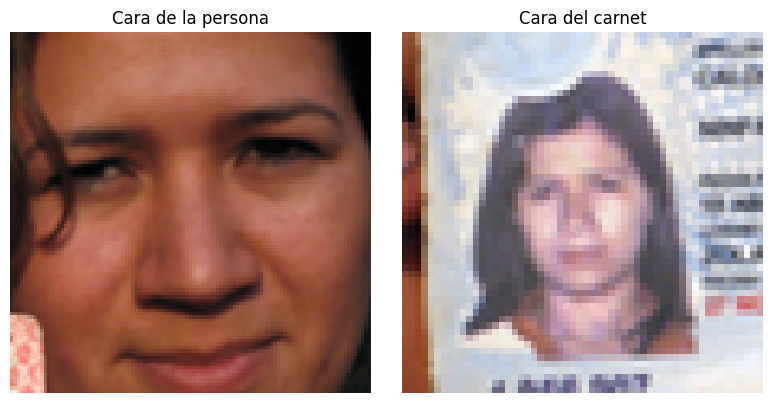

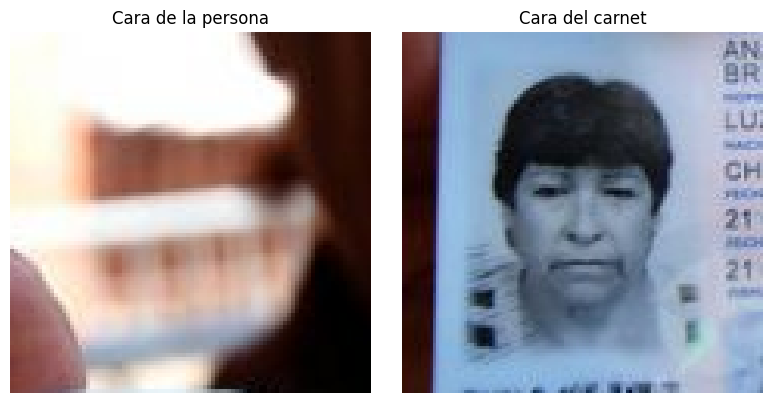

In [23]:
import cv2
import matplotlib.pyplot as plt

# Cargar clasificador Haar Cascade para rostros
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def encontrar_caras(imagen):
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 5)
    return faces  # Lista de (x, y, w, h)

def clasificar_caras(faces, img_shape):
    # Si hay dos caras y una es mucho más grande, asumimos que es la persona
    if len(faces) == 2:
        areas = [w*h for (x, y, w, h) in faces]
        idx_persona = areas.index(max(areas))
        idx_carnet = 1 - idx_persona
        return faces[idx_persona], faces[idx_carnet]
    # Si solo hay una cara, asumimos que es la persona
    if len(faces) == 1:
        return faces[0], None
    # Si hay más de dos, puedes usar más heurísticas aquí
    return None, None

def expand_bbox(x, y, w, h, shape, factor=0.4):
    """Expande el bounding box de la cara en todas las direcciones por un factor dado."""
    img_h, img_w = shape[:2]
    dw = int(w * factor / 2)
    dh = int(h * factor / 2)
    x_new = max(0, x - dw)
    y_new = max(0, y - dh)
    w_new = min(img_w - x_new, w + 2 * dw)
    h_new = min(img_h - y_new, h + 2 * dh)
    return x_new, y_new, w_new, h_new

def mostrar_caras(img, cara_persona, cara_carnet):
    caras = []
    titles = []
    # Cara de la persona (recorte normal)
    if cara_persona is not None:
        x, y, w, h = cara_persona
        caras.append(cv2.cvtColor(img[y:y+h, x:x+w], cv2.COLOR_BGR2RGB))
        titles.append("Cara de la persona")
    else:
        caras.append([[0]])
        titles.append("Cara de la persona NO encontrada")
    # Cara del carnet (recorte expandido)
    if cara_carnet is not None:
        x, y, w, h = cara_carnet
        x_e, y_e, w_e, h_e = expand_bbox(x, y, w, h, img.shape, factor=1) # El factor es el Zoom a la cara del Carnet 0 = 0% y 1 = 1%
        caras.append(cv2.cvtColor(img[y_e:y_e+h_e, x_e:x_e+w_e], cv2.COLOR_BGR2RGB))
        titles.append("Cara del carnet")
    else:
        caras.append([[0]])
        titles.append("Cara del carnet NO encontrada")
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    for ax, cara, title in zip(axes, caras, titles):
        if isinstance(cara, list):
            ax.text(0.5, 0.5, 'NO encontrada', fontsize=12, ha='center')
            ax.axis('off')
        else:
            ax.imshow(cara)
            ax.axis('off')
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

# Procesa varias imágenes
img_paths = ["/content/drive/MyDrive/Colab Notebooks/PERSONA_DNI.jpg","/content/drive/MyDrive/Colab Notebooks/SENNORA_DNI.jpg"]  # Cambia por tus rutas

for img_path in img_paths:
    img = cv2.imread(img_path)
    if img is None:
        print(f"No se pudo cargar la imagen {img_path}")
        continue
    faces = encontrar_caras(img)
    cara_persona, cara_carnet = clasificar_caras(faces, img.shape)
    mostrar_caras(img, cara_persona, cara_carnet)